#  Task 3: Interactive Business Dashboard in Streamlit

##  Problem Statement & Objective
Develop an interactive dashboard using Streamlit to analyze sales, profit, and segment-wise performance based on the **Global Superstore Dataset**.

###  Goals:
- Clean and prepare the dataset
- Build a Streamlit dashboard with filters (Region, Category, Sub-Category)
- Display KPIs using charts:
  - Total Sales
  - Profit
  - Top 5 Customers by Sales

##  Dataset Description & Loading
The dataset contains global order data including sales, profit, customer information, and product categories.


In [1]:
import pandas as pd

# Load dataset (replace 'GlobalSuperstor2e.csv' with actual filename)
df = pd.read_csv('Global_Superstore2.csv', encoding='ISO-8859-1')

# Preview
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


##  Data Cleaning & Preprocessing
- Convert dates
- Handle missing values
- Check data types

In [2]:
# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Drop rows with missing values in key columns
df.dropna(subset=['Sales', 'Profit', 'Customer Name', 'Category', 'Region'], inplace=True)

# Basic info
df.info()

C:\Users\User\AppData\Local\Temp\ipykernel_28172\4098218633.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\User\AppData\Local\Temp\ipykernel_28172\4098218633.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## Exploratory Data Analysis (EDA)

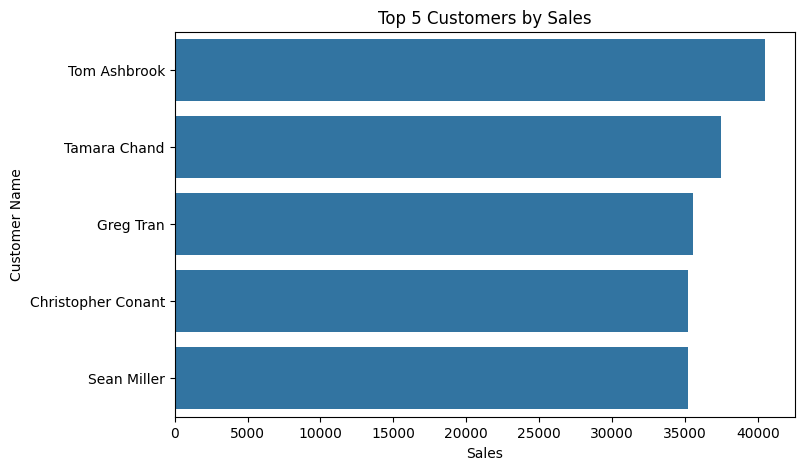

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 customers by sales
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 5 Customers by Sales')
plt.xlabel('Sales')
plt.show()